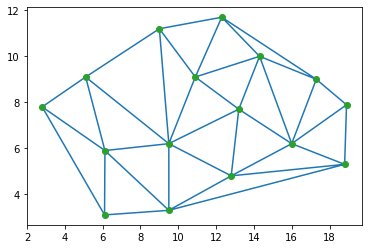

[[ 1  2  0]
 [ 2  3  0]
 [12 10  9]
 [12 15 10]
 [ 7  4 13]
 [ 4  2  1]
 [11  7 13]
 [11 13 14]
 [15 11 14]
 [12 11 15]
 [10  6  9]
 [ 5  4  7]
 [ 4  5  2]
 [ 5  3  2]
 [ 6  5  9]
 [ 5  6  3]
 [11  8  7]
 [ 8 11 12]
 [ 8 12  9]
 [ 5  8  9]
 [ 8  5  7]]
[[[ 6.1   3.1 ]
  [ 6.12  5.9 ]
  [ 2.8   7.8 ]]

 [[ 6.12  5.9 ]
  [ 5.1   9.1 ]
  [ 2.8   7.8 ]]

 [[14.3  10.  ]
  [12.3  11.7 ]
  [10.9   9.1 ]]

 [[14.3  10.  ]
  [17.3   9.  ]
  [12.3  11.7 ]]

 [[12.8   4.8 ]
  [ 9.5   3.3 ]
  [18.8   5.3 ]]

 [[ 9.5   3.3 ]
  [ 6.12  5.9 ]
  [ 6.1   3.1 ]]

 [[16.    6.2 ]
  [12.8   4.8 ]
  [18.8   5.3 ]]

 [[16.    6.2 ]
  [18.8   5.3 ]
  [18.9   7.89]]

 [[17.3   9.  ]
  [16.    6.2 ]
  [18.9   7.89]]

 [[14.3  10.  ]
  [16.    6.2 ]
  [17.3   9.  ]]

 [[12.3  11.7 ]
  [ 9.   11.2 ]
  [10.9   9.1 ]]

 [[ 9.5   6.2 ]
  [ 9.5   3.3 ]
  [12.8   4.8 ]]

 [[ 9.5   3.3 ]
  [ 9.5   6.2 ]
  [ 6.12  5.9 ]]

 [[ 9.5   6.2 ]
  [ 5.1   9.1 ]
  [ 6.12  5.9 ]]

 [[ 9.   11.2 ]
  [ 9.5   6.2 ]
  [10.9   9.1 ]

In [2]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Triangulation of a set of points:
points = np.array([[2.8, 7.8], [6.1, 3.1], [6.12, 5.9], [5.1, 9.1],[9.5, 3.3], [9.5, 6.2], [9, 11.2], [12.8, 4.8],[13.2, 7.7], [10.9, 9.1], [12.3, 11.7], [16, 6.2],[14.3, 10], [18.8, 5.3],[18.9, 7.89], [17.3, 9.0]]) # 定义三角点
tri = Delaunay(points) # 三角剖分

# We can plot it:
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

# Point indices and coordinates for the two triangles forming the triangulation:
print(tri.simplices) # 每个三角面对应的点的索引index
print(points[tri.simplices]) # 每个三角面所包含的坐标点

# Triangle 0 is the only neighbor of triangle 1, and it’s opposite to vertex 1 of triangle 1:
print(tri.neighbors[1]) # 第一个三角面周围有几个邻居三角形，这里只有 1 个
print(points[tri.simplices[1,0]]) # 第 1 个三角面的 X 坐标
print(points[tri.simplices[1,1]]) # 第 1 个三角面的 Y 坐标
print(points[tri.simplices[1,2]]) # 第 1 个三角面的 Z 坐标

# We can find out which triangle points are in:
p = np.array([(0.1, 0.2), (1.5, 0.5)]) # 判断两个点是都在三角网内部
print(tri.find_simplex(p))

# We can also compute barycentric(重心) coordinates in triangle 1 for these points:
b = tri.transform[1,:2].dot(p - tri.transform[1,2])
print(tri)
print(np.c_[b, 1 - b.sum(axis=1)])